#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/healthcare-dataset-stroke-data.csv'
dataset = pd.read_csv(dataset_path)

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#checking the number of samples and features
print('Number of samples : ', dataset.shape[0])
print('Number of features : ', dataset.shape[1])
print('List of features : ', dataset.columns.tolist())

Number of samples :  5110
Number of features :  12
List of features :  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#Checking missing values

In [6]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The bmi column has 201 missing point. The mean value of bmi column is used to replace the missing values

In [7]:
dataset.fillna(value = dataset.bmi.mean(), inplace = True)

In [8]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#Data Visulization

##Heat Map Correlation
Let's find out the correlation between different features and our target. Here, we calculate the correlation using corr() function and then we plot the heatmap plot. According to the data, stroke has a positive correlation with age, hypertension, heart_diseas, glucose level. 

In [9]:
dataset.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


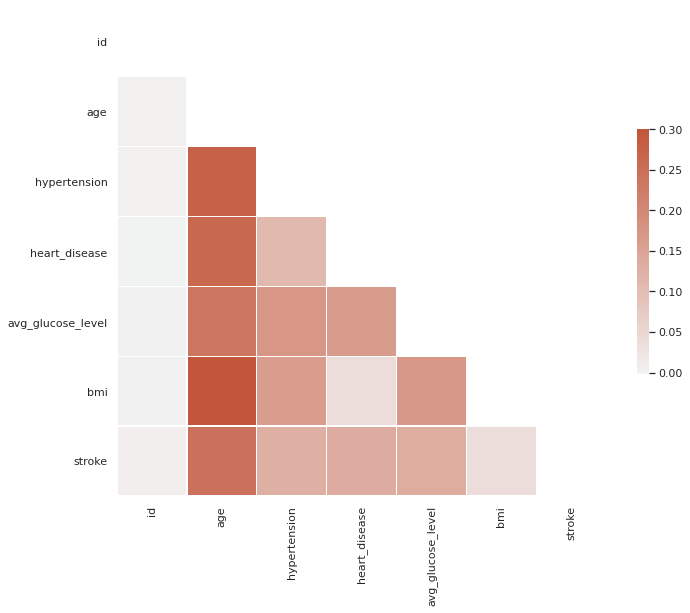

In [10]:

# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 720x576 with 0 Axes>

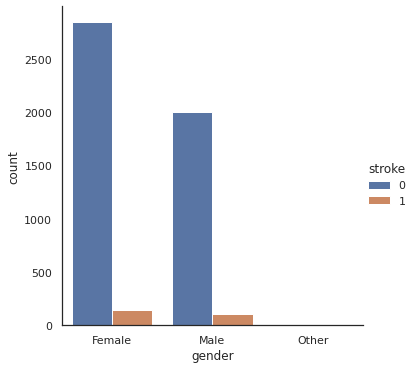

In [11]:
plt.figure(figsize = (10, 8))
df1 = dataset.groupby('gender')['stroke'].value_counts()
#df1 = df1.mul(100)
df1 = df1.rename('count').reset_index()
sns.catplot(x='gender',y='count',hue='stroke',kind='bar',data=df1)



##Count Plots
###Gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


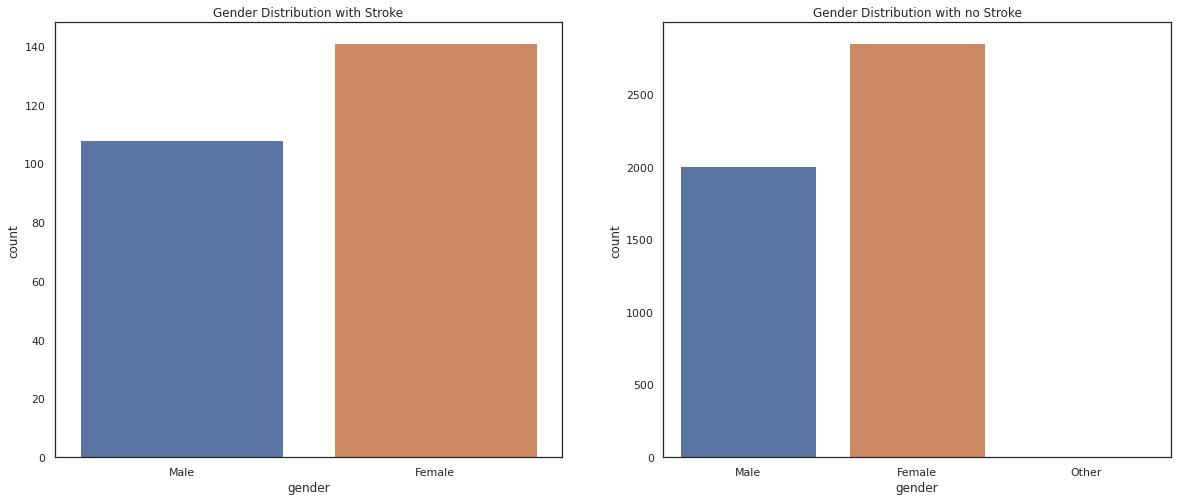

In [12]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data = dataset[dataset['stroke'] == 1])
plt.title('Gender Distribution with Stroke')
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data = dataset[dataset['stroke'] == 0])
plt.title('Gender Distribution with no Stroke')
print(dataset.gender.value_counts())

##Hypertension

0    4612
1     498
Name: hypertension, dtype: int64


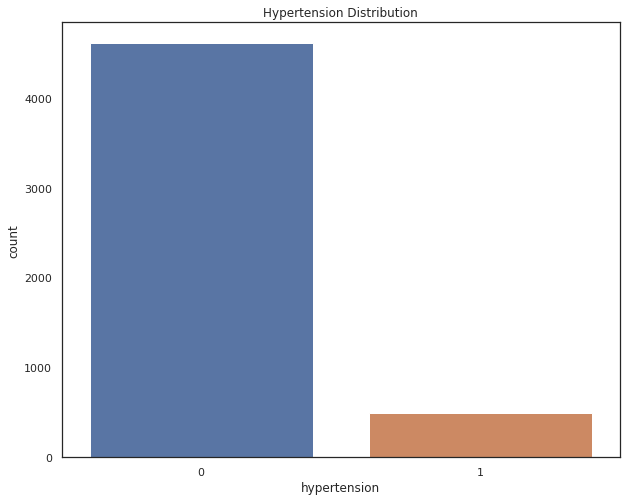

In [13]:
plt.figure(figsize = (10, 8))
sns.countplot(x='hypertension', data = dataset)
plt.title('Hypertension Distribution')
print(dataset.hypertension.value_counts())

##Marital Status

Yes    3353
No     1757
Name: ever_married, dtype: int64


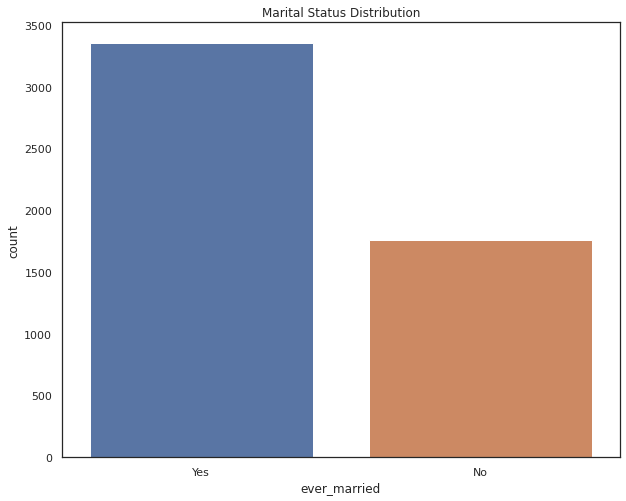

In [14]:
plt.figure(figsize = (10, 8))
plt.title('Marital Status Distribution')
sns.countplot(x='ever_married', data = dataset)
print(dataset.ever_married.value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


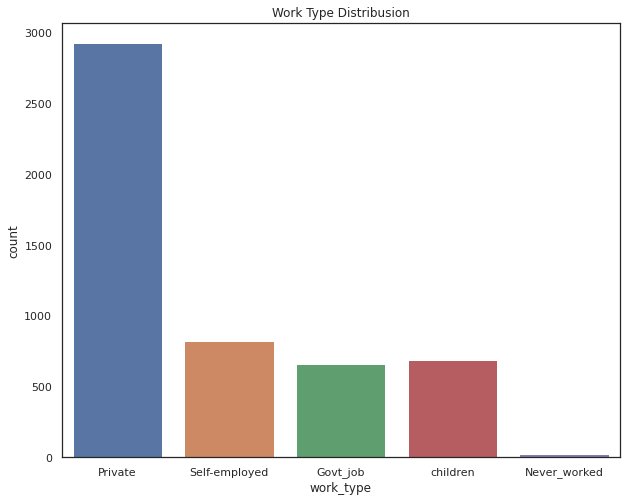

In [15]:
plt.figure(figsize = (10, 8))
sns.countplot(x='work_type', data = dataset)
plt.title('Work Type Distribusion')
print(dataset.work_type.value_counts())

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


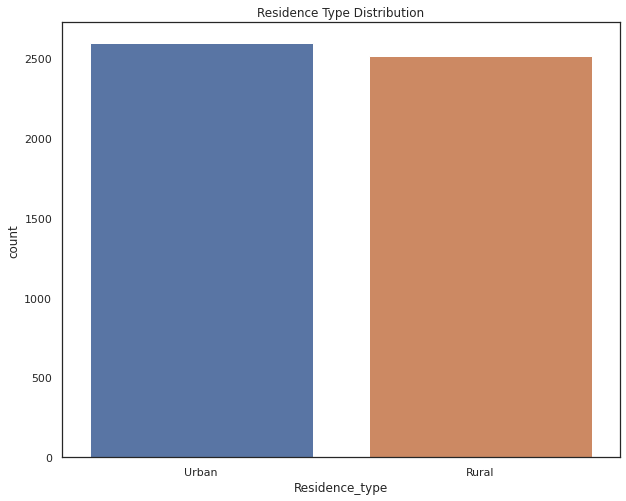

In [16]:
plt.figure(figsize = (10, 8))
sns.countplot(x='Residence_type', data = dataset)
plt.title('Residence Type Distribution')
print(dataset.Residence_type.value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


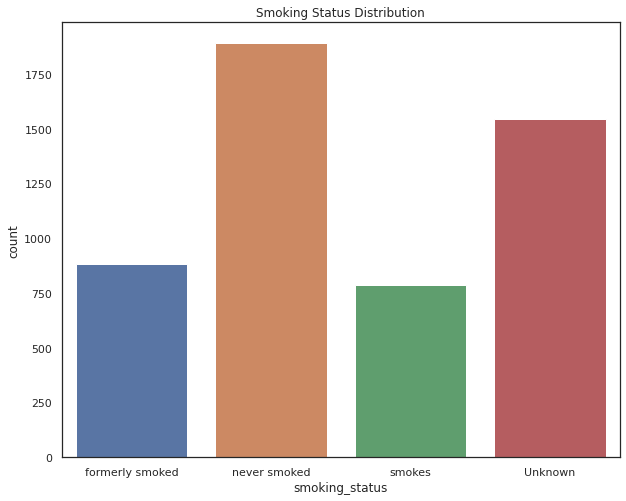

In [17]:
plt.figure(figsize = (10, 8))
sns.countplot(x='smoking_status', data = dataset)
plt.title('Smoking Status Distribution')
print(dataset.smoking_status.value_counts())

##Averaged Glucose level

(0.0, 300.0)

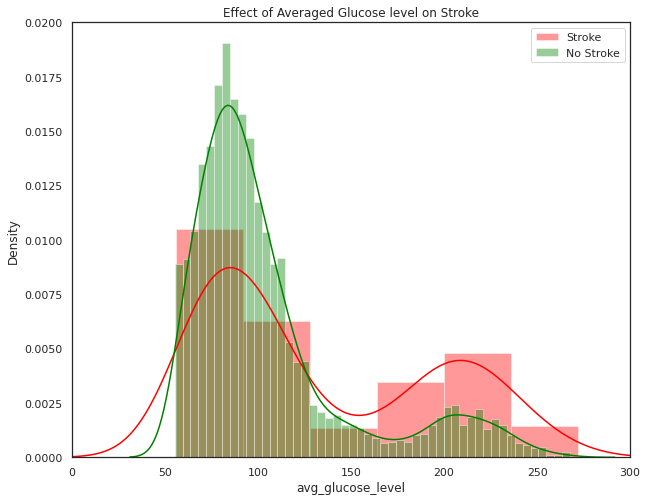

In [18]:
plt.figure(figsize = (10,8))
sns.distplot(dataset[dataset['stroke'] == 1]['avg_glucose_level'], color = 'red', label = 'Stroke', kde = True)
sns.distplot(dataset[dataset['stroke'] == 0]['avg_glucose_level'], color = 'green', label = 'No Stroke', kde = True)
plt.title('Effect of Averaged Glucose level on Stroke')
plt.legend()
plt.xlim((0, 300))

##BMI

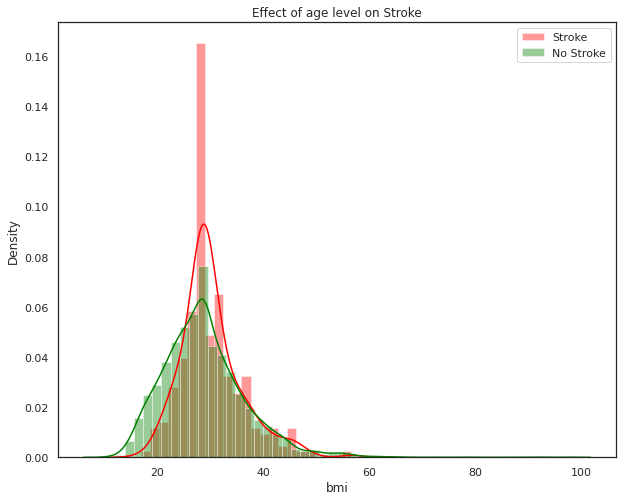

In [19]:
plt.figure(figsize = (10,8))
sns.distplot(dataset[dataset['stroke'] == 1]['bmi'], color = 'red', label = 'Stroke', kde = True)
sns.distplot(dataset[dataset['stroke'] == 0]['bmi'], color = 'green', label = 'No Stroke', kde = True)
plt.title('Effect of age level on Stroke')
plt.legend()

##Age

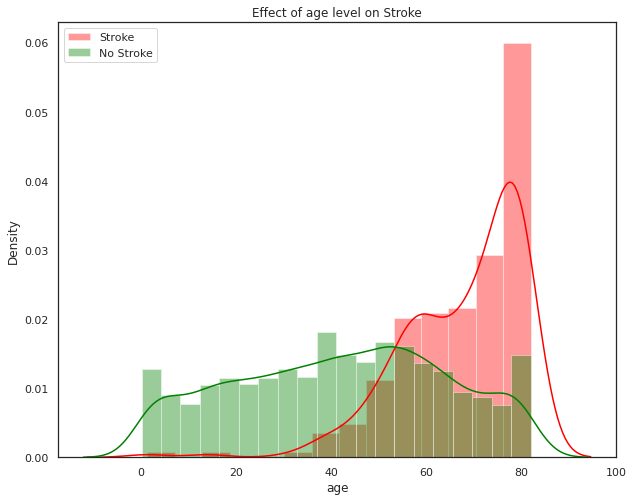

In [20]:
plt.figure(figsize = (10,8))
sns.distplot(dataset[dataset['stroke'] == 1]['age'], color = 'red', label = 'Stroke', kde = True)
sns.distplot(dataset[dataset['stroke'] == 0]['age'], color = 'green', label = 'No Stroke', kde = True)
plt.title('Effect of age level on Stroke')
plt.legend()

In [21]:
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:, -1].values

In [22]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked


In [23]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
X.shape

(5110, 10)

#Convert categorical variable into dummy/indicator variables.

In [25]:
X = pd.get_dummies(X, drop_first = True)

In [26]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0


In [27]:
X= X.values

In [28]:
print(X.shape)
print(y.shape)

(5110, 16)
(5110,)


#Splitting the Data to train and test sets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
print(f'Number of X_train datasets: {X_train.shape}')
print(f'Number of X_test datasets: {X_test.shape}')
print(f'Number of y_train datasets: {y_train.shape}')
print(f'Number of y_test datasets: {y_test.shape}')

Number of X_train datasets: (4088, 16)
Number of X_test datasets: (1022, 16)
Number of y_train datasets: (4088,)
Number of y_test datasets: (1022,)


#Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,3,4]] = sc.fit_transform(X_train[:,[0,3,4]])
X_test[:, [0,3,4]] = sc.transform(X_test[:, [0,3,4]])

#Handling Imbalance data using SMOTE

0    4861
1     249
Name: stroke, dtype: int64


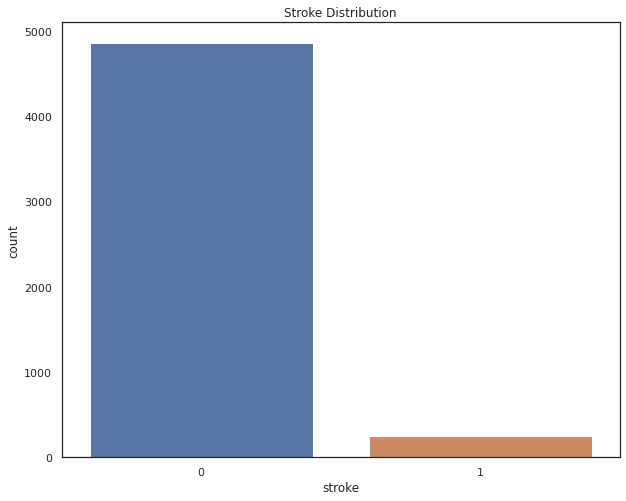

In [32]:
plt.figure(figsize = (10, 8))
sns.countplot(x='stroke', data = dataset)
plt.title('Stroke Distribution')
print(dataset.stroke.value_counts())

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 16)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


#Model Selection

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [37]:
models = [['LogisticRegression', LogisticRegression()], [ 'KNeighborsClassifier', KNeighborsClassifier()],
          ['RandomForestClassifier', RandomForestClassifier()], ['XGBClassifier', XGBClassifier()]]
models_score = []
for model_name , model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(model_name)
  print(cm)

  print('accuracy:', accuracy)
  print('precision:', precision)
  print('recall:', recall)
  print('f1_score', f1)
  print('----------------------------------------------')
  history = []
  history.append(model_name)
  history.append(accuracy)
  history.append(precision)
  history.append(recall)
  history.append(f1)
  models_score.append(history)


LogisticRegression
[[745 223]
 [ 17  37]]
accuracy: 0.7651663405088063
precision: 0.1423076923076923
recall: 0.6851851851851852
f1_score 0.23566878980891717
----------------------------------------------
KNeighborsClassifier
[[824 144]
 [ 35  19]]
accuracy: 0.824853228962818
precision: 0.1165644171779141
recall: 0.35185185185185186
f1_score 0.17511520737327188
----------------------------------------------
RandomForestClassifier
[[941  27]
 [ 49   5]]
accuracy: 0.9256360078277887
precision: 0.15625
recall: 0.09259259259259259
f1_score 0.11627906976744184
----------------------------------------------
XGBClassifier
[[872  96]
 [ 35  19]]
accuracy: 0.8718199608610567
precision: 0.16521739130434782
recall: 0.35185185185185186
f1_score 0.2248520710059172
----------------------------------------------


In [38]:
print(models_score)

[['LogisticRegression', 0.7651663405088063, 0.1423076923076923, 0.6851851851851852, 0.23566878980891717], ['KNeighborsClassifier', 0.824853228962818, 0.1165644171779141, 0.35185185185185186, 0.17511520737327188], ['RandomForestClassifier', 0.9256360078277887, 0.15625, 0.09259259259259259, 0.11627906976744184], ['XGBClassifier', 0.8718199608610567, 0.16521739130434782, 0.35185185185185186, 0.2248520710059172]]


In [39]:
df = pd.DataFrame(models_score, columns= ['Model', 'Accuracy', 'precision', 'recall', 'f1 score'])

In [40]:
df.head()

,Model,Accuracy,precision,recall,f1 score
0,LogisticRegression,0.765166,0.142308,0.685185,0.235669
1,KNeighborsClassifier,0.824853,0.116564,0.351852,0.175115
2,RandomForestClassifier,0.925636,0.156250,0.092593,0.116279
3,XGBClassifier,0.871820,0.165217,0.351852,0.224852


In [41]:
df.sort_values(by = ['Accuracy'], ascending = False)

,Model,Accuracy,precision,recall,f1 score
2,RandomForestClassifier,0.925636,0.156250,0.092593,0.116279
3,XGBClassifier,0.871820,0.165217,0.351852,0.224852
1,KNeighborsClassifier,0.824853,0.116564,0.351852,0.175115
0,LogisticRegression,0.765166,0.142308,0.685185,0.235669


#Model Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {'n_estimators' : [100, 150, 200], 'criterion' : ['gini', 'entropy']}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, scoring = 'precision', cv = 10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [44]:
# A parameter grid for XGBoost


parameters = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 10, 15]
        }
grid_search = GridSearchCV(estimator = XGBClassifier(), param_grid = parameters, scoring='roc_auc', cv = 10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [45]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9965718131213338
{'learning_rate': 0.1, 'max_depth': 15}


In [46]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(cm)

0.8718199608610567
[[872  96]
 [ 35  19]]


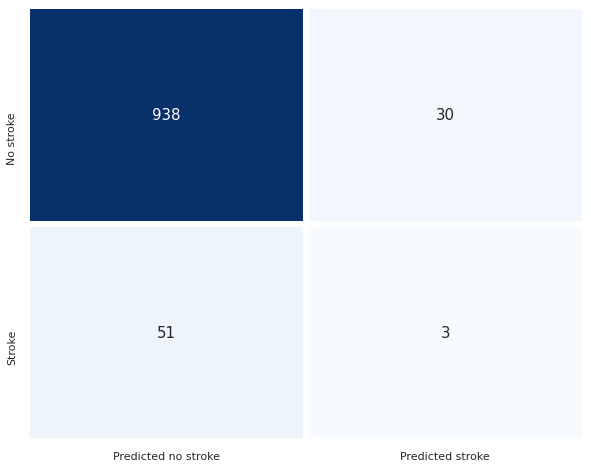

In [52]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt='d', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])

In [53]:
model = RandomForestClassifier(n_estimators=150, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(cm)

0.9256360078277887
[[941  27]
 [ 49   5]]


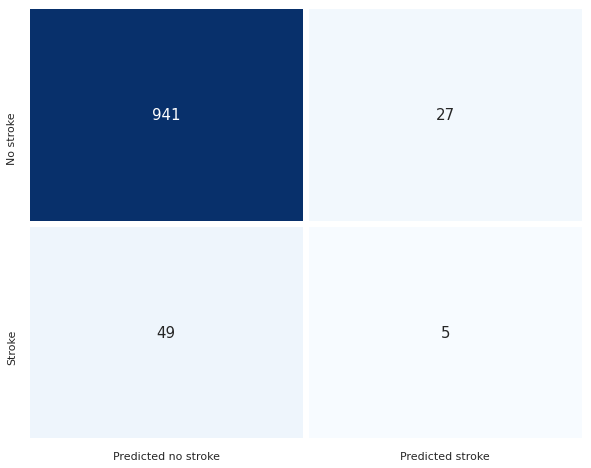

In [54]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt='d', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])

In [55]:
LRModel = LogisticRegression()
LRModel.fit(X_train, y_train)
KNNModel = KNeighborsClassifier()
KNNModel.fit(X_train, y_train)
RFModel = RandomForestClassifier(n_estimators=150, criterion='entropy')
RFModel.fit(X_train, y_train)
XGBModel = XGBClassifier(learning_rate = 0.1, max_depth = 15)
XGBModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#Saving Model

In [56]:
import pickle 
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/LRModel.pkl", mode = "wb") 
pickle.dump(LRModel, pickle_out) 
pickle_out.close()
import pickle 
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/KNNModel.pkl", mode = "wb") 
pickle.dump(KNNModel, pickle_out) 
pickle_out.close()
import pickle 
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/RFModel.pkl", mode = "wb") 
pickle.dump(RFModel, pickle_out) 
pickle_out.close()
import pickle 
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/XGBModel.pkl", mode = "wb") 
pickle.dump(XGBModel, pickle_out) 
pickle_out.close()
# saving the scaler
import pickle 
pickle_out = open("/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/scaler.pkl", mode = "wb") 
pickle.dump(sc, pickle_out) 
pickle_out.close()

In [ ]:
# saving the model 
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [ ]:
# saving the scaler
import pickle 
pickle_out = open("scaler.pkl", mode = "wb") 
pickle.dump(sc, pickle_out) 
pickle_out.close()

#Model Deployment
Streamlit will be used to deploy the model

In [57]:
!pip install -q streamlit
!pip install -q streamlit_ace
!pip install -q pyngrok

     |████████████████████████████████| 8.2MB 7.6MB/s 
     |████████████████████████████████| 163kB 53.3MB/s 
     |████████████████████████████████| 4.2MB 44.3MB/s 
     |████████████████████████████████| 112kB 60.3MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 122kB 60.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
     |████████████████████████████████| 3.9MB 8.9MB/s 
     |████████████████████████████████| 747kB 8.7MB/s 


In [7]:
%%writefile app.py
 
import pickle
import streamlit as st
import pandas as pd
import numpy as np



scaler_path = "/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/scaler.pkl"
scaler = pickle.load(open(scaler_path, 'rb'))

# loading the trained model
def model_selection(model):
  import pickle
  if model == "Linear Regression":
    model_path = "/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/LRModel.pkl"
  elif model == "K Nearest Neighbor":
    model_path = "/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/KNNModel.pkl"
  elif model == "Random Forest":
    model_path = "/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/RFModel.pkl"
  else:
    model_path = "/content/drive/MyDrive/Colab Notebooks/Projects/Health Care/Stroke Prediction/XGBModel.pkl"
  
  model = pickle.load(open(model_path, 'rb'))

  return model

def gender_transformer(df, gender):
  if gender == 'Male':
    df['gender_Male'] = [1]
    df['gender_Other'] = [0]
  elif gender == 'Other':
    df['gender_Other'] = [1]
    df['gender_Male'] = [0]
  else:
    df['gender_Male'] = [0]
    df['gender_Other'] = [1]


def hypertension_transformer(df, hypertension):
  if hypertension == 'Yes':
    df['hypertension'] = [1]
  else:
    df['hypertension'] = [0]

def heart_disease_transformer(df, heart_disease):
  if heart_disease == 'Yes':
    df['heart_disease'] = [1]
  else:
    df['heart_disease'] = [0]

def marriage_transformer(df, married):
  if married == 'Yes':
    df['ever_married_Yes'] = [1]
  else:
    df['ever_married_Yes'] = [0]

def worktype_transformer(df, work_type):
  if work_type == 'Never_worked':
    df['work_type_Never_worked'] = [1]
    df['work_type_Private'] = [0]
    df['work_type_children'] = [0]
    df['work_type_Self-employed'] = [0]
  elif work_type == 'Private':
    df['work_type_Never_worked'] = [0]
    df['work_type_Private'] = [1]
    df['work_type_children'] = [0]
    df['work_type_Self-employed'] = [0]
  elif work_type == 'Self-employed':
    df['work_type_Never_worked'] = [0]
    df['work_type_Private'] = [0]
    df['work_type_children'] = [0]
    df['work_type_Self-employed'] = [1]
  elif work_type == 'children':
    df['work_type_Never_worked'] = [0]
    df['work_type_Private'] = [0]
    df['work_type_children'] = [1]
    df['work_type_Self-employed'] = [0]
  else:
    df['work_type_Never_worked'] = [0]
    df['work_type_Private'] = [0]
    df['work_type_children'] = [0]
    df['work_type_Self-employed'] = [0]


def residence_type_transformer(df, Residence_type):
  if Residence_type == 'Urban':
    df['Residence_type_Urban'] = [1]
  else:
    df['Residence_type_Urban'] = [0]

def smoking_transformer(df, smoking_status):
  if smoking_status == 'formerly smoked':
    df['smoking_status_formerly smoked'] = [1]
    df['smoking_status_never smoked'] = [0]
    df['smoking_status_smokes'] = [0]
  elif smoking_status == 'never smoked':
    df['smoking_status_formerly smoked'] = [0]
    df['smoking_status_never smoked'] = [1]
    df['smoking_status_smokes'] = [0]
  elif smoking_status == 'Smokes':
    df['smoking_status_formerly smoked'] = [0]
    df['smoking_status_never smoked'] = [0]
    df['smoking_status_smokes'] = [1]
  else:
    df['smoking_status_formerly smoked'] = [0]
    df['smoking_status_never smoked'] = [0]
    df['smoking_status_smokes'] = [0]

def prediction(age, hypertension, heart_disease, avg_glucose_level, bmi, gender, married, Residence_type, work_type, smoking_status, model):
  cols = ['age', 'hypertension', 'heart_disease',  'avg_glucose_level', 'bmi', 'gender_Male',
       'gender_Other', 'ever_married_Yes','work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']
  df = pd.DataFrame(columns= cols)
  gender_transformer(df, gender)
  hypertension_transformer(df, hypertension)
  heart_disease_transformer(df, heart_disease)
  marriage_transformer(df, married)
  worktype_transformer(df, work_type)
  residence_type_transformer(df, Residence_type)
  smoking_transformer(df, smoking_status)
  columns = ['age', 'avg_glucose_level','bmi']
  df[columns] = [age, avg_glucose_level, bmi]
  df[columns]=df[columns].astype(int)
  df[columns] = scaler.transform(df[columns])
  


  model = model_selection(model)
  # Making predictions 
  #prediction = model.predict(df.values)
  prediction = model.predict_proba(df.values)
  prob_pred = prediction[0][1]*100
    
  return int(prob_pred)
         
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:grey;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Heart Stroke Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    #age = st.number_input("Age")
    age = st.slider('Age', 0, 100, 30)
    hypertension = st.selectbox('Hypertension',("...", "Yes","No"))
    heart_disease = st.selectbox('Heart Disease',("...","Yes","No"))
    #avg_glucose_level = st.number_input("Average Glucose Level")
    avg_glucose_level = st.slider('Average Glucose Level',0, 300, 100 )
    #bmi = st.number_input("BMI")
    bmi = st.slider('BMI', 0, 100, 30)
    gender = st.selectbox('Gender',("...","Male","Female","Other"))
    married = st.selectbox('Ever Married?',("...","Yes","No"))
    Residence_type = st.selectbox('Residence Type',("...","Urban","Rural")) 
    work_type = st.selectbox('Work Type',("...","Never_worked","Private","Self-employed", "children", 'Goverment'))
    smoking_status = st.selectbox('Smoking Status',("...","Smokes","never smoked", "formerly smoked"))
    model = st.selectbox('Prediction Model',("...","Linear Regression", "K Nearest Neighbor", "Random Forest","XGBoost"))

    result =""

    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(age, hypertension, heart_disease, avg_glucose_level, bmi, gender, married, Residence_type, work_type, smoking_status, model)
        st.success('You will have {}'.format(result))
        #print(LoanAmount)
     
if __name__=='__main__': 
    main()

Overwriting app.py


In [2]:
!streamlit run app.py &>/dev/null&

In [3]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://00c3377ff6e6.ngrok.io" -> "http://localhost:8501">